<a href="https://colab.research.google.com/github/danielfsimangunsong/craiglist-sales-prediction/blob/main/Craiglist_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Craiglist Sales Prediction**
by: [Daniel Fernando Parulian Simangunsong](https://github.com/danielfsimangunsong) | 
[Github Repository](https://github.com/danielfsimangunsong/craiglist-sales-prediction)

---

## **Taks List**
1. Explore the dataset with the following conditions:
  1. The most popular vehicle types by state (Sort by manufacturer, model, fuel, transmission, drive, size, type and paint_color)
  2. The most frequently used car status (Hint: use the year column and odometer)
  3. State that post the most ads
2. Preprocess the dataset
3. Make predictions:
  1. Prices of used vehicles of certain types
  2. Fraud advertisements

# Set-up

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielfernandops","key":"24cc724d18fe992359b37824aeea83f1"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download austinreese/craigslist-carstrucks-data

 96% 251M/262M [00:02<00:00, 121MB/s]
100% 262M/262M [00:02<00:00, 99.9MB/s]


In [8]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Import dataset
raw_data = pd.read_csv("craigslist-carstrucks-data.zip")

# Dataset Checking and Exploration

In [ ]:
# First five rows of dataset
raw_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
print("Number of rows: ", raw_data.shape[0])
print("Number of columns: ", raw_data.shape[1])

Number of rows:  426880
Number of columns:  26


In [ ]:
# Numeric dataset characteristic
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02


In [ ]:
# Non-numeric dataset characteristic
raw_data.describe(include=object).T

,count,unique,top,freq
url,426880,426880,https://prescott.craigslist.org/cto/d/prescott...,1
region,426880,404,columbus,3608
region_url,426880,413,https://spokane.craigslist.org,2988
manufacturer,409234,42,ford,70985
model,421603,29667,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524


In [ ]:
# Quick overview of dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

> As we can see that "county" column only has null value, so I will drop it.

### Task 1.1. The most popular vehicle types by state

In [ ]:
# Display the most popular vehicle types by state
# Each state displayed its popular value for each column of manufacturer, model, fuel, transmission, drive, size, type and paint_color
state_data = raw_data.groupby(['state']).agg(pd.Series.mode)
state_data[['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']]

,manufacturer,model,fuel,transmission,drive,size,type,paint_color
state,,,,,,,,
ak,ford,f-150,gas,automatic,4wd,full-size,SUV,white
al,ford,f-150,gas,automatic,fwd,full-size,sedan,white
ar,chevrolet,silverado 1500,gas,automatic,4wd,full-size,pickup,white
az,ford,f-150,gas,automatic,fwd,full-size,sedan,white
ca,ford,f-150,gas,automatic,fwd,full-size,sedan,white
co,ford,f-150,gas,automatic,4wd,full-size,SUV,white
ct,ford,forester,gas,automatic,4wd,full-size,sedan,black
dc,ford,camry,gas,automatic,fwd,full-size,sedan,black
de,ford,super duty f-550 drw,gas,automatic,4wd,full-size,sedan,white


### Task 1.2. The most frequently state uses car

In [ ]:
# Create new column "total_usage" that has value of usage of car
# The value is from odometer divided by year spent car is used
# If there is year that has value less then or equal to 0, the value is odomoter
current_year = 2021
raw_data["total_usage"] = raw_data.apply(lambda row: row["odometer"]/(current_year-row["year"])
                                          if ((current_year-row["year"]) > 0) 
                                          else row["odometer"],
                                          axis=1)

In [ ]:
# Create a grouped by dataframe by state
groupby_state = raw_data.groupby("state", as_index=False).sum()
groupby_state = groupby_state.sort_values("total_usage", ascending=False)
groupby_state.head()

,state,id,price,year,odometer,county,lat,long,total_usage
4,ca,370118000501500,6079810600,101542366.0,4.647913e+09,0.0,1.831731e+06,-5.951609e+06,5.662541e+08
43,tx,167780918621832,489738641,46071964.0,2.374037e+09,0.0,7.041447e+05,-2.247992e+06,3.892099e+08
9,fl,208467430078681,508986359,57205929.0,2.873596e+09,0.0,8.037212e+05,-2.327302e+06,3.565830e+08
22,mi,123555653136052,508226170,33987799.0,1.891498e+09,0.0,7.201685e+05,-1.422465e+06,2.227544e+08
34,ny,141736658076538,329106819,38967787.0,1.688486e+09,0.0,8.058422e+05,-1.445525e+06,2.083921e+08


Text(0.5, 1.0, 'Total Car Usage Each State')

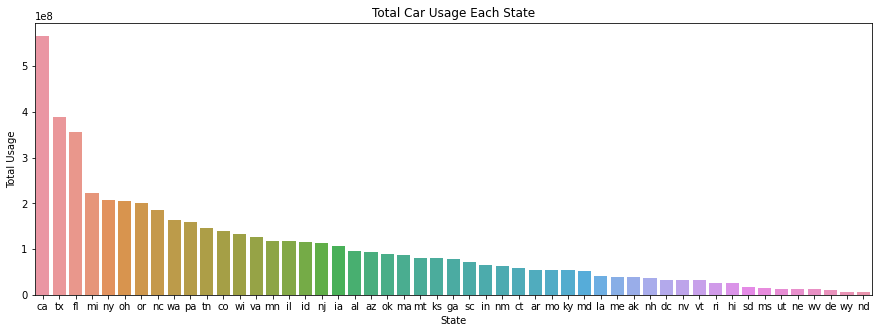

In [ ]:
# Create a barplot to visualize "total_usage" column by state
plt.figure(figsize=(15,5))
sns.barplot(x="state", y="total_usage", data=groupby_state)
plt.xlabel("State")
plt.ylabel("Total Usage")
plt.title("Total Car Usage Each State")

> So, California is the most frequent state uses cars

### Task 1.3. State that post the most ads

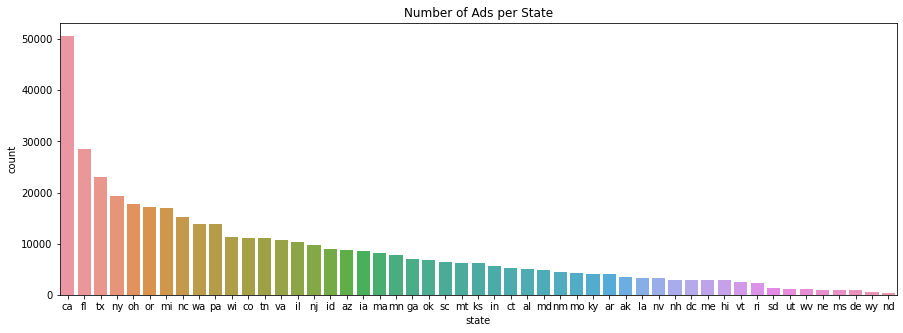

In [ ]:
# Create a countplot to visualize the state frequency of posting ads
plt.figure(figsize=(15,5))
sns.countplot(x="state", data=raw_data, order = raw_data["state"].value_counts().index)
plt.title("Number of Ads per State");

> So, California is the most frequent state that post ads

# Task 2. Dataset Preprocessing

## Missing values handling
In this part also do some feature engeneering to get more useful data.

In [10]:
# Function to check the total and percentage of missing values ​​in the dataframe
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=["Total", "Percent"])
    result = missing_data[missing_data["Total"] > 0]
    if (result.shape[0]>0):
      print(result)
    else:
      print("There is no null value")

In [11]:
cek_null(raw_data)

               Total   Percent
county        426880  1.000000
size          306361  0.717675
cylinders     177678  0.416225
condition     174104  0.407852
VIN           161042  0.377254
drive         130567  0.305863
paint_color   130203  0.305011
type           92858  0.217527
manufacturer   17646  0.041337
title_status    8242  0.019308
lat             6549  0.015342
long            6549  0.015342
model           5277  0.012362
odometer        4400  0.010307
fuel            3013  0.007058
transmission    2556  0.005988
year            1205  0.002823
description       70  0.000164
image_url         68  0.000159
posting_date      68  0.000159


In [12]:
to_del_col = ["county", "id", "url", "VIN", "description", "region", "region_url", "image_url", "lat", "size", "model", "long"]
raw_data = raw_data.drop(raw_data[to_del_col], axis=1)

In [13]:
# Menghapus sisa baris yang memiliki nilai null
# Delete remaining null value rows
no_null_values_data = raw_data.dropna()

In [14]:
cek_null(no_null_values_data)

There is no null value


## Duplicate rows handling

In [15]:
# View number of duplicate rows 
print("Number of duplicate rows: ", no_null_values_data.duplicated().sum())

Number of duplicate rows:  285


In [16]:
# Drop duplicate rows
no_duplicate_row_data = no_null_values_data.drop_duplicates()

In [17]:
print("Number of duplicate rows: ", no_duplicate_row_data.duplicated().sum())

Number of duplicate rows:  0


## Feature Engineering

In [18]:
# Drop rows that has "posting_date" less than "year" (manufactured year)
# and then drop "posting_date" column
# Idea from https://github.com/KushanSingh/Used-Cars-Dataset-EDA/blob/main/vehicles.ipynb

# Create a new column only the substring of year from the "posting_date" column
no_duplicate_row_data["posting_year"]  = no_duplicate_row_data["posting_date"].str.slice(0, 4)
no_duplicate_row_data["posting_year"]  = no_duplicate_row_data["posting_year"].astype(float)

# Drop rows that has "posting_date" less than "year"
no_duplicate_row_data = no_duplicate_row_data.drop(no_duplicate_row_data[no_duplicate_row_data["posting_year"] < no_duplicate_row_data["year"]].index)

# Drop "posting_date" column
no_duplicate_row_data = no_duplicate_row_data.drop(["posting_date"], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
# Extract the number and then replace the column value with that number in the "cylinders" column
no_duplicate_row_data["cylinders"] = no_duplicate_row_data["cylinders"].str.extract("(\d+)")

# Fill null value with 0 in "cylinders" column if fuel value is 'electric'
no_duplicate_row_data["cylinders"] = no_duplicate_row_data.apply(
    lambda row: 0 if (pd.isnull(row["cylinders"]) and (row["fuel"] == 'electric')) 
       else row["cylinders"],
    axis=1
)

In [20]:
# Drop rows with a "price" less than equal to 0
no_duplicate_row_data = no_duplicate_row_data[no_duplicate_row_data["price"] > 0]

In [21]:
# Drop rows with a "year" less than equal to 0
no_duplicate_row_data = no_duplicate_row_data[no_duplicate_row_data["year"] > 0]

In [22]:
# Check number of unique value of each non-numeric column
non_numeric_cols = ["manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "type", "paint_color", "state"]
for cols in non_numeric_cols:
  print("%15s" % cols + "%5d" % (no_duplicate_row_data[cols].nunique()))

   manufacturer   42
      condition    6
      cylinders    8
           fuel    5
   title_status    6
   transmission    3
          drive    3
           type   13
    paint_color   12
          state   51


> Because there are so many unique value in manufacturer, type, paint_color, and state columns, I will drop them

In [23]:
no_duplicate_row_data = no_duplicate_row_data.drop(["manufacturer", "type", "paint_color", "state"], axis=1)

## Convert categorical columns to dummy variables

In [24]:
# Convert categorical column to dummy
dummies = pd.get_dummies(no_duplicate_row_data[["condition", "cylinders", "fuel", "title_status", "transmission", "drive"]], 
                                            drop_first=True)
# Drop unused column
no_duplicate_row_data = no_duplicate_row_data.drop(["condition", "cylinders", "fuel", "title_status", "transmission", "drive"], axis=1)
# Concate dummies with original dataset
preprocessed_data = pd.concat([no_duplicate_row_data,dummies],axis=1)

In [25]:
preprocessed_data.head()

,price,year,odometer,posting_year,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10,...,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd
31,15000,2013.0,128000.0,2021.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32,27990,2012.0,68696.0,2021.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33,34590,2016.0,29499.0,2021.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,35000,2019.0,43000.0,2021.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,29990,2016.0,17302.0,2021.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
print("Number of rows: ", preprocessed_data.shape[0])
print("Number of columns: ", preprocessed_data.shape[1])

Number of rows:  112515
Number of columns:  29


# Price Prediction

## Preparation

In [ ]:
# Further preprocessing is required before creating the price prediction model
# Another value preprocessing required is to delete rows that has a value of >= 45000 or <= 500
# It also aims to handle outliers more precisely by removing values ​​that are too low or too high
# Idea found at https://github.com/panambY/Used_Car_Price/blob/master/Used_Car_Price.ipynb
price_pred_data = preprocessed_data[(preprocessed_data["price"]>500) & (preprocessed_data["price"]<45000)]

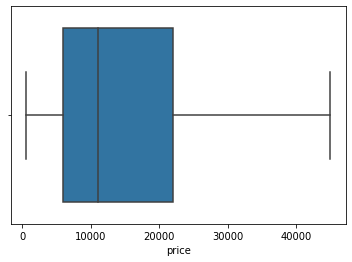

In [ ]:
# Create a boxplot
sns.boxplot(x=price_pred_data["price"])

In [ ]:
# Split features and target columns
X = price_pred_data.drop(["price"], axis=1)
y = price_pred_data["price"]

In [ ]:
# Perform train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize feature column value using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Function for regression model evaluation

In [ ]:
# Function for regression model evaluation
import math 
from sklearn import metrics

# Idea from https://github.com/panambY/Used_Car_Price/blob/master/Used_Car_Price.ipynb
def evaluate_regressor_performance(model_name, prediction, y_test = y_test):
  # Value of MSE, MAE, RMSE, and R2 Square
  mse = metrics.mean_squared_error(y_test, prediction)
  mae = metrics.mean_absolute_error(y_test, prediction)
  rmse = math.sqrt(metrics.mean_squared_error(y_test, prediction))
  r2_square = metrics.r2_score(y_test, prediction)
  return pd.DataFrame( { 'Model Name': model_name,
                           'MSE': mse,
                           'MAE': mae,
                           'RMSE': rmse, 
                           'R2 Square': r2_square}, index=[0] )

## Gradient Boosting Regressor

In [ ]:
# Create and train Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42, max_depth=10)

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, random_state=42)

In [ ]:
# Predict "price" with Gradient Boosting Regressor model
gbr_pred = gbr_model.predict(X_test)

In [ ]:
# Evaluate Gradient Boosting Regressor model
gbr_evaluation = evaluate_regressor_performance("GradientBoostingRegressor", gbr_pred)
gbr_evaluation

,Model Name,MSE,MAE,RMSE,R2 Square
0,GradientBoostingRegressor,1.679632e+07,2722.353142,4098.330928,0.864036


## Random Forest Regressor

In [ ]:
# Create and train Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42)

rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict "price" with Random Forest Regressor model
rfr_pred = rfr_model.predict(X_test)

In [ ]:
# Evaluate Gradient Random Forest Regressor model
rfr_evaluation = evaluate_regressor_performance("RandomForestRegressor", rfr_pred)
rfr_evaluation

,Model Name,MSE,MAE,RMSE,R2 Square
0,RandomForestRegressor,1.583459e+07,2279.107549,3979.270207,0.871822


## Neural Network

In [ ]:
# import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
# Split train and validation dataset
X_sep = int(X_train.shape[0]*0.6)
y_sep = int(y_train.shape[0]*0.6)

X_nn_train = X_train[:X_sep]
y_nn_train = y_train[:y_sep]

X_nn_valid = X_train[X_sep:]
y_nn_valid = y_train[y_sep:]

In [ ]:
input_shape = [X_nn_train.shape[1]]

In [ ]:
# Create and train Neural Network Model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dropout(0.2),
    
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),

    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    
    layers.BatchNormalization(),
    layers.Dense(1),
])

early_stopping = callbacks.EarlyStopping(
    patience=15,
    restore_best_weights=True,
)

model.compile(
    optimizer='adam',
    loss='mse',
)

EPOCHS = 100
history = model.fit(
    X_nn_train, y_nn_train,
    validation_data=(X_nn_valid, y_nn_valid),
    batch_size=64,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/100
807/807 [==============================] - 10s 10ms/step - loss: 345106080.0000 - val_loss: 342083776.0000
Epoch 2/100
807/807 [==============================] - 8s 10ms/step - loss: 335943776.0000 - val_loss: 330238048.0000
Epoch 3/100
807/807 [==============================] - 9s 11ms/step - loss: 320142688.0000 - val_loss: 312584704.0000
Epoch 4/100
807/807 [==============================] - 9s 11ms/step - loss: 299598080.0000 - val_loss: 286733376.0000
Epoch 5/100
807/807 [==============================] - 8s 10ms/step - loss: 275752352.0000 - val_loss: 264793760.0000
Epoch 6/100
807/807 [==============================] - 9s 11ms/step - loss: 249639152.0000 - val_loss: 238571280.0000
Epoch 7/100
807/807 [==============================] - 9s 11ms/step - loss: 222077408.0000 - val_loss: 213467088.0000
Epoch 8/100
807/807 [==============================] - 8s 10ms/step - loss: 194100160.0000 - val_loss: 183786464.0000
Epoch 9/100
807/807 [==============================] - 

Minimum Validation Loss: 22179020.0000


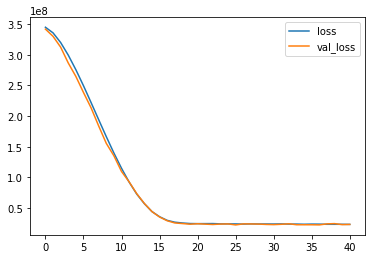

In [ ]:
# Make visualization of loss and validation loss
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [ ]:
# Predict "price" with Neural Network
nn_pred = model.predict(X_test)

In [ ]:
# Evaluate Neural Network model
nn_evaluation = evaluate_regressor_performance("NeuralNetwork", nn_pred)
nn_evaluation

,Model Name,MSE,MAE,RMSE,R2 Square
0,NeuralNetwork,2.246154e+07,3352.726062,4739.361063,0.818177


## Compare Regression Model's Performance
> This section aims to compare the results of the evaluation of the models that have been made and determine which model has the best performance.

In [ ]:
# Menampilkan perbandingan hasil evaluasi model-model klasifikasi
models_result = pd.concat([gbr_evaluation, rfr_model, nn_evaluation])
models_result.sort_values('Recall Macro Average', ascending=False)

,Model Name,Accuracy,Precision Macro Average,Precision Micro Average,Recall Macro Average,Recall Micro Average,F1 Macro Average,F1 Micro Average
0,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,Neural Network,0.976684,0.960232,0.976684,0.760831,0.976684,0.830437,0.976684
0,Naive Bayes,0.964353,0.981993,0.964353,0.611283,0.964353,0.672879,0.964353


# Fraud Prediction

## Preparation

In [27]:
# Labeling price as fraud or non-fraud based on its value
# Price is labeled 1 as fraud if the value is <= 500 or >= 45000, 0 otherwise
fraud_pred_data = preprocessed_data.copy()
fraud_pred_data["label"] = fraud_pred_data.apply(
    lambda row: 1 if (row["price"] <= 500 or row["price"] >= 45000) 
       else 0,
    axis=1
)

Counter({0: 107498, 1: 5017})


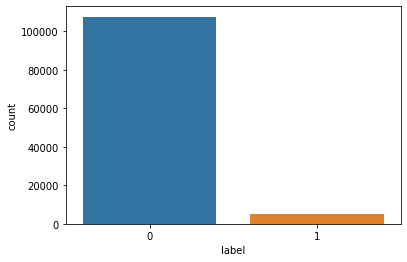

In [28]:
# Check the distribution of fraud and non-fraud label using countplot
sns.countplot(x="label", data=fraud_pred_data[["label"]])

# Print number of row of each label
from collections import Counter
counter = Counter(fraud_pred_data["label"])
print(counter)

> We can see that the label distribution is not balance. So, we need to do balancing on that. I will do data oversampling using SMOTE technique on training data.

In [29]:
# Split features and target columns
# Also drop "price" column to prevent data leakage
X1 = fraud_pred_data.drop(["label", "price"], axis=1)
y1 = fraud_pred_data["label"]

In [30]:
# Perform train-test-split
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [31]:
# Normalize feature column value using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [32]:
# Oversampling on training data
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X1_train, y1_train = oversample.fit_resample(X1_train, y1_train)

Counter({0: 75263, 1: 75263})


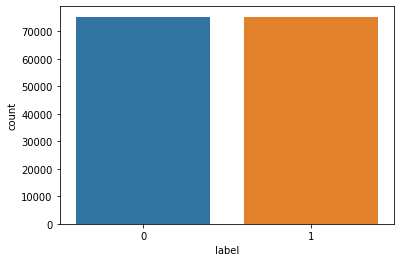

In [33]:
# Check the distribution of fraud and non-fraud label on oversampled data using countplot
oversampled_data = pd.DataFrame(X1_train, columns=X1.columns)
oversampled_data['label'] = y1_train
sns.countplot(x='label', data=oversampled_data)

# Print number of row of each label
counter = Counter(y1_train)
print(counter)

In [34]:
oversampled_data.head()

,year,odometer,posting_year,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10,cylinders_12,...,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,label
0,0.672098,-0.034336,0.0,-0.187323,-0.829736,-0.347683,-0.069629,-0.053046,-0.088276,-0.024174,...,-0.088713,-0.046783,-0.022258,-0.180648,-0.113632,-0.279634,-0.352118,-0.717286,-0.560868,0
1,0.074368,0.297571,0.0,-0.187323,1.205202,-0.347683,-0.069629,-0.053046,-0.088276,-0.024174,...,-0.088713,-0.046783,-0.022258,-0.180648,-0.113632,-0.279634,-0.352118,-0.717286,1.782951,0
2,0.373233,-0.021908,0.0,-0.187323,1.205202,-0.347683,-0.069629,-0.053046,-0.088276,-0.024174,...,-0.088713,-0.046783,-0.022258,-0.180648,-0.113632,-0.279634,-0.352118,1.394144,-0.560868,0
3,-1.918064,-0.433441,0.0,-0.187323,-0.829736,2.876183,-0.069629,-0.053046,-0.088276,-0.024174,...,-0.088713,-0.046783,-0.022258,-0.180648,-0.113632,-0.279634,-0.352118,1.394144,-0.560868,0
4,-0.025253,0.650151,0.0,-0.187323,-0.829736,2.876183,-0.069629,-0.053046,-0.088276,-0.024174,...,-0.088713,-0.046783,-0.022258,-0.180648,-0.113632,-0.279634,-0.352118,1.394144,-0.560868,0


### Function for classification model evaluation

In [35]:
# Function for evaluate the classification model
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(model_name, classifier, prediction, y1_test = y1_test):
    # Evaluation information in a compact way
    # print("Evaluation Result:\n\n%s\n" % (classification_report(y1_test, prediction)))

    # Confusion Matrix
    # print("Confusion Matrix\n")
    if model_name != "NeuralNetwork":
      ConfusionMatrixDisplay.from_estimator(classifier, X1_test, y1_test)

    accuracy = accuracy_score(y1_test, prediction)
    precision_macro_average = precision_score(y1_test, prediction, average='macro')
    precision_micro_average = precision_score(y1_test, prediction, average='micro')
    recall_macro_average = recall_score(y1_test, prediction, average='macro')
    recall_micro_average = recall_score(y1_test, prediction, average='micro')
    f1_macro_average = f1_score(y1_test, prediction, average='macro')
    f1_micro_average = f1_score(y1_test, prediction, average='micro')
    return pd.DataFrame( { 'Model Name': model_name,
                           'Accuracy': accuracy,
                           'Precision Macro Average': precision_macro_average,
                           'Precision Micro Average': precision_micro_average, 
                           'Recall Macro Average': recall_macro_average,
                           'Recall Micro Average': recall_micro_average,
                           'F1 Macro Average': f1_macro_average, 
                           'F1 Micro Average': f1_micro_average}, index=[0])

## Logistic Regression

In [49]:
# Create and train Logistic Regression model
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression()

lgr_model.fit(X1_train, y1_train)

LogisticRegression()

In [50]:
# Predict "price" with Logistic Regression model
lgr_pred = lgr_model.predict(X1_test)

,Model Name,Accuracy,Precision Macro Average,Precision Micro Average,Recall Macro Average,Recall Micro Average,F1 Macro Average,F1 Micro Average
0,LogisticRegression,0.775085,0.562141,0.775085,0.77003,0.775085,0.551275,0.775085


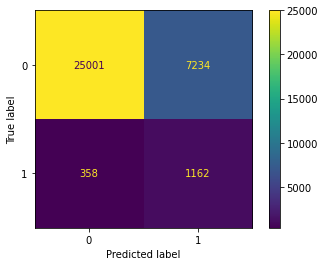

In [51]:
# Evaluate Gradient Boosting Regressor model
lgr_evaluation = evaluate_classifier_performance("LogisticRegression", lgr_model, lgr_pred)
lgr_evaluation

## Naive Bayes

In [52]:
# Create and train Naive Bayes model
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

bayes.fit(X1_train, y1_train)

GaussianNB()

In [53]:
# Predict "price" with Naive Bayes model
bayes_pred = bayes.predict(X1_test)

,Model Name,Accuracy,Precision Macro Average,Precision Micro Average,Recall Macro Average,Recall Micro Average,F1 Macro Average,F1 Micro Average
0,Naive Bayes,0.842334,0.574648,0.842334,0.74506,0.842334,0.589405,0.842334


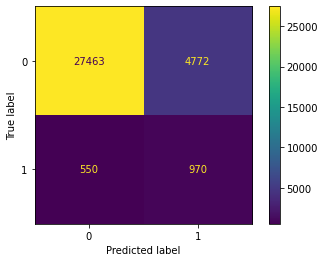

In [54]:
# Evaluate Naive Bayes model
bayes_evaluation = evaluate_classifier_performance("Naive Bayes", bayes, bayes_pred)
bayes_evaluation

## Random Forest Classification

In [65]:
# Create and train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=42)

rfc_model.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

In [66]:
# Predict "price" with Random Forest Classifier model
rfc_pred = rfc_model.predict(X1_test)

,Model Name,Accuracy,Precision Macro Average,Precision Micro Average,Recall Macro Average,Recall Micro Average,F1 Macro Average,F1 Micro Average
0,Random Forest Classifier,0.958999,0.759841,0.958999,0.854412,0.958999,0.798638,0.958999


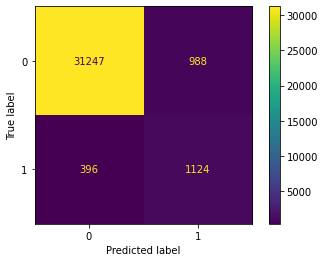

In [67]:
# Evaluate Random Forest Classifier model
rfc_evaluation = evaluate_classifier_performance("Random Forest Classifier", rfc_model, rfc_pred)
rfc_evaluation

## Neural Network

In [58]:
# import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [59]:
# Split train and validation dataset
X1_sep = int(X1_train.shape[0]*0.8)
y1_sep = int(y1_train.shape[0]*0.8)

X1_nn_train = X1_train[:X1_sep]
y1_nn_train = y1_train[:y1_sep]

X1_nn_valid = X1_train[X1_sep:]
y1_nn_valid = y1_train[y1_sep:]

In [60]:
input_shape = [X1_nn_train.shape[1]]

In [61]:
# Create and train Neural Network Model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

EPOCHS = 10
history1 = model.fit(
    X1_nn_train, y1_nn_train,
    validation_data=(X1_nn_valid, y1_nn_valid),
    epochs=EPOCHS,
    verbose=1,
)

Epoch 1/10
3764/3764 [==============================] - 18s 5ms/step - loss: 0.3909 - accuracy: 0.8290 - val_loss: 0.5375 - val_accuracy: 0.7101
Epoch 2/10
3764/3764 [==============================] - 18s 5ms/step - loss: 0.3577 - accuracy: 0.8447 - val_loss: 0.4751 - val_accuracy: 0.7361
Epoch 3/10
3764/3764 [==============================] - 18s 5ms/step - loss: 0.3428 - accuracy: 0.8538 - val_loss: 0.4371 - val_accuracy: 0.7656
Epoch 4/10
3764/3764 [==============================] - 18s 5ms/step - loss: 0.3315 - accuracy: 0.8593 - val_loss: 0.4371 - val_accuracy: 0.7800
Epoch 5/10
3764/3764 [==============================] - 12s 3ms/step - loss: 0.3245 - accuracy: 0.8636 - val_loss: 0.4231 - val_accuracy: 0.7828
Epoch 6/10
3764/3764 [==============================] - 12s 3ms/step - loss: 0.3175 - accuracy: 0.8652 - val_loss: 0.4465 - val_accuracy: 0.7669
Epoch 7/10
3764/3764 [==============================] - 12s 3ms/step - loss: 0.3116 - accuracy: 0.8678 - val_loss: 0.3988 - val_ac

Minimum Validation Loss: 0.3988


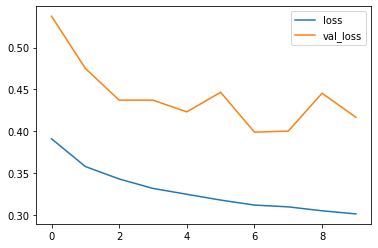

In [62]:
# Make visualization of loss and validation loss
history_df = pd.DataFrame(history1.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [63]:
# Predict "price" with Neural Network
nn1_pred = model.predict(X1_test)

In [64]:
# Evaluate Neural Network model
nn1_evaluation = evaluate_classifier_performance("NeuralNetwork", model, nn1_pred.astype(int))
nn1_evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model Name,Accuracy,Precision Macro Average,Precision Micro Average,Recall Macro Average,Recall Micro Average,F1 Macro Average,F1 Micro Average
0,NeuralNetwork,0.95497,0.477485,0.95497,0.5,0.95497,0.488483,0.95497


## Compare Classification Model's Performance
> This section aims to compare the results of the evaluation of the models that have been made and determine which model has the best performance.

In [69]:
# Menampilkan perbandingan hasil evaluasi model-model klasifikasi
models_result = pd.concat([lgr_evaluation, bayes_evaluation, rfc_evaluation, nn1_evaluation])
models_result.sort_values('Recall Macro Average', ascending=False)

,Model Name,Accuracy,Precision Macro Average,Precision Micro Average,Recall Macro Average,Recall Micro Average,F1 Macro Average,F1 Micro Average
0,Random Forest Classifier,0.958999,0.759841,0.958999,0.854412,0.958999,0.798638,0.958999
0,LogisticRegression,0.775085,0.562141,0.775085,0.770030,0.775085,0.551275,0.775085
0,Naive Bayes,0.842334,0.574648,0.842334,0.745060,0.842334,0.589405,0.842334
0,NeuralNetwork,0.954970,0.477485,0.954970,0.500000,0.954970,0.488483,0.954970
